<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/cont/11_drzewo_decyzyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
>Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  
>
>Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)
>
>Podstawowa biblioteka do uczenia maszynowego w języku Python.
>
>Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
pip install scikit-learn
```

### Spis treści:
1. [Import bibliotek](#1)
2. [Załadowanie danych](#2)
3. [Eksploracja danych](#3)
4. [Przygotowanie danych do modelu](#4)
5. [Budowa klasyfikatora drzewa decyzyjnego](#5)
6. [Graf drzewa decyzyjnego](#6)
7. [Budowa funkcji dla modelu drzewa decyzyjnego](#7)

### <a name='1'></a> Import bibliotek

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set()
np.random.seed(42)

### <a name='2'></a> Załadowanie danych

In [2]:
iris = load_iris()
data = iris.data
targets = iris.target
feature_names = [name.replace(' ', '_')[:-5] for name in iris.feature_names]
target_names = iris.target_names

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca: {target_names}')

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


### <a name='3'></a> Eksploracja danych
Iris Setosa

In [3]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=200)

Iris Versicolor

In [4]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=200)

Iris Virginica

In [5]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=200)

In [6]:
data_targets = np.c_[data, targets]
df = pd.DataFrame(data_targets, columns=feature_names + ['target'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
df.describe().T.apply(lambda x: round(x, 2))

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
target,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


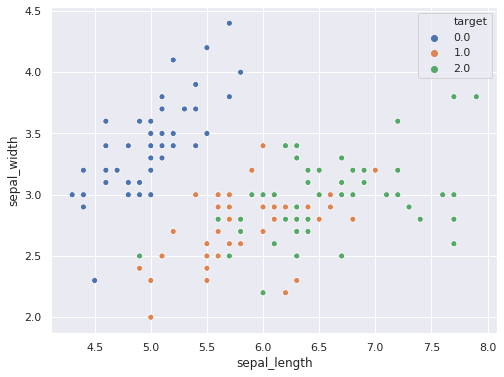

In [8]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot('sepal_length', 'sepal_width', hue='target', data=df, legend='full', palette=sns.color_palette()[:3])

In [9]:
df['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

### <a name='4'></a> Przygotowanie danych do modelu

In [10]:
data = df.copy()
data = data[['sepal_length', 'sepal_width', 'target']]
target = data.pop('target')

data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [11]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [0]:
data = data.values
target = target.values.astype('int16')

### <a name='5'></a> Budowa klasyfikatora drzewa decyzyjnego
- max_depth=1


In [13]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=42)
classifier.fit(data, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

Wykreślenie granic decyzyjnych

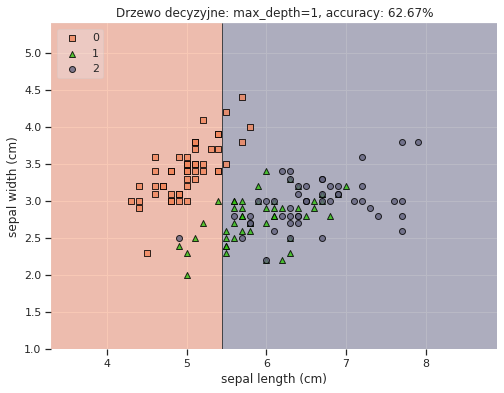

In [14]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(data, target)

plt.figure(figsize=(8, 6))
plot_decision_regions(data, target, classifier, legend=2, colors=colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%')
plt.show()

### <a name='6'></a>  Graf drzewa decyzyjnego
- max_depth = 1

Wyświetlenie grafu drzewa decyzyjnego

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


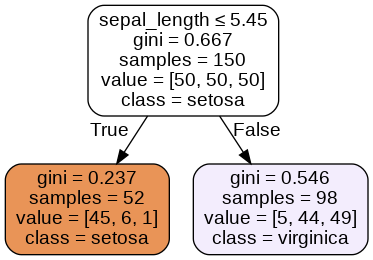

In [15]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(classifier,
               out_file=dot_data,
               feature_names=feature_names[:2],
               class_names=target_names,
               special_characters=True,
               rounded=True,
               filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png(), width=250)

### <a name='7'></a> Budowa funkcji dla modelu drzewa decyzyjnego

In [0]:
def make_decision_tree(max_depth=1):
    # trenowanie modelu
    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    classifier.fit(data, target)

    # eksport grafu drzewa
    dot_data = StringIO()
    export_graphviz(classifier,
                   out_file=dot_data,
                   feature_names=feature_names[:2],
                   class_names=target_names,
                   special_characters=True,
                   rounded=True,
                   filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')
    
    # obliczenie dokładności
    acc = classifier.score(data, target) 

    # wykreślenie granic decyzyjnych
    colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
    plt.figure(figsize=(8, 6))
    ax = plot_decision_regions(data, target, classifier, legend=0, colors=colors)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['setosa', 'versicolor', 'virginica'], framealpha=0.3)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.title(f'Drzewo decyzyjne: max_depth={max_depth}, accuracy={acc * 100:.2f}')
    
    return Image(graph.create_png(), width=150 + max_depth * 120)


- max_depth=2


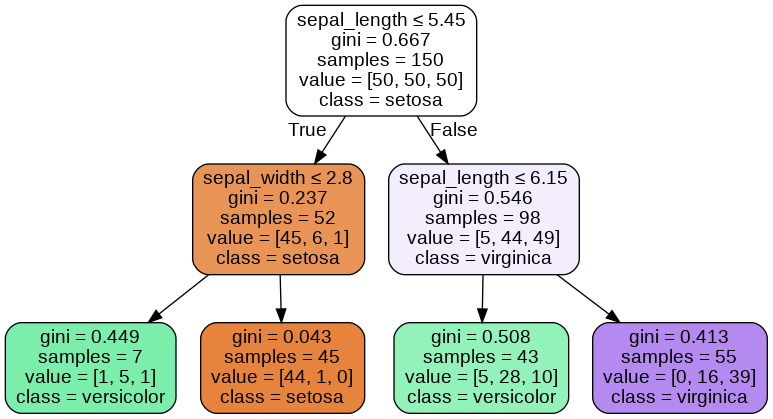

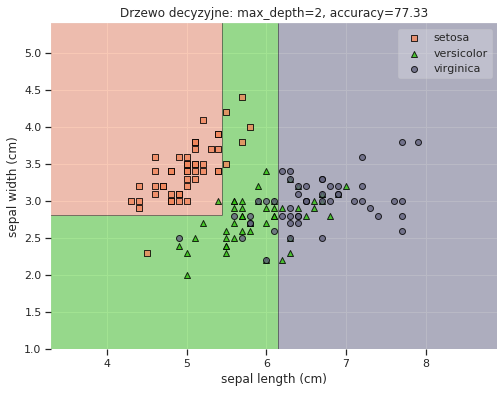

In [17]:
make_decision_tree(max_depth=2)

- max_depth=3

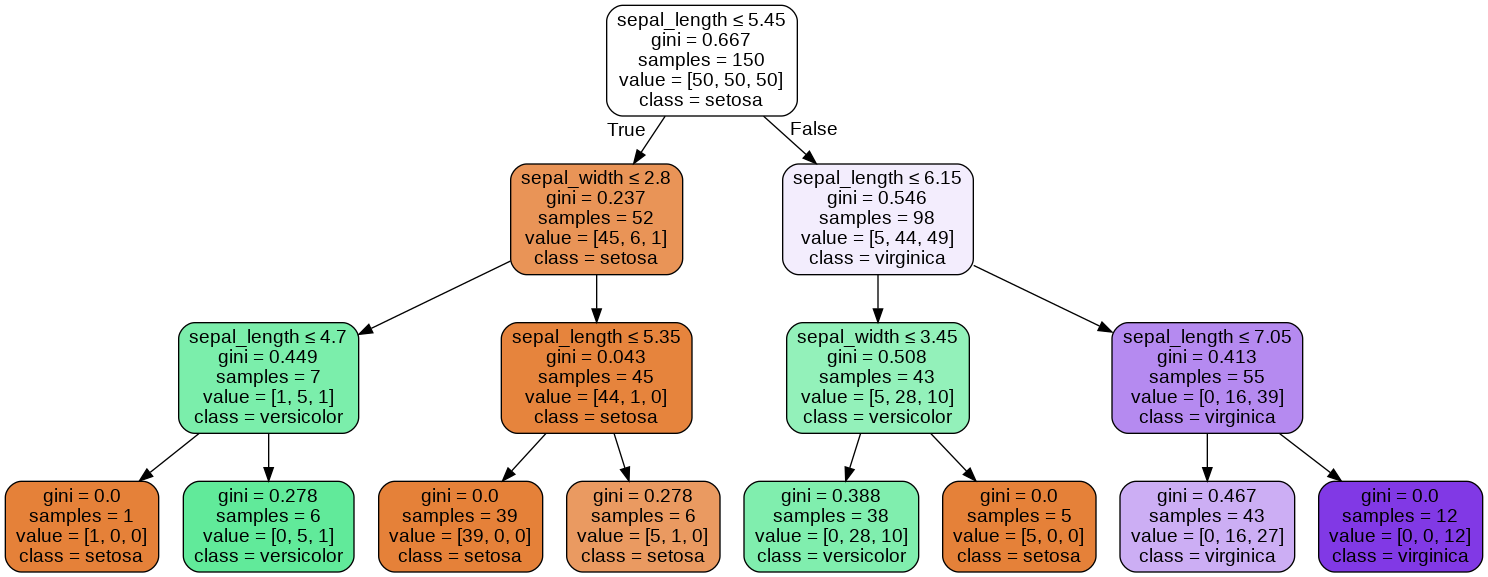

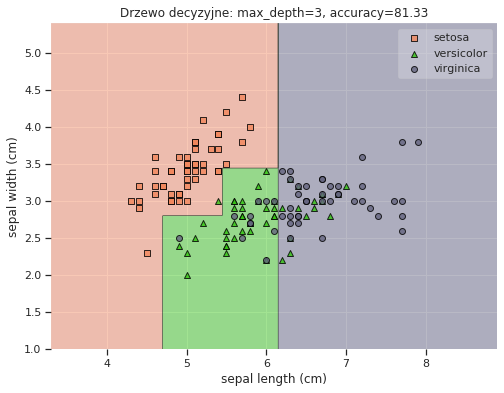

In [18]:
make_decision_tree(max_depth=3)

### Wskaźnik Giniego
Miara zanieczyszczenia
- węzeł jest czysty (wszystkie próbki w węźle należą do tej samej klasy), gdy Gini = 0

$$G_i = 1 - \sum_{k=1}^{n}p_{i,k}^{2}$$

$p_{i, k}$ - współczynnik występowania klas k wśród próbek uczących w $i$-tym węźle

Gini dla korzenia (root) - poziom 0

In [19]:
1 - (50 / 150)**2 - (50 / 150)**2 - (50 / 150)**2

0.6666666666666665

Poziom 1, węzeł lewy

In [20]:
1 - (50 / 50)**2 - (0 / 50)**2 - (0 / 50)**2

0.0

Poziom 1, węzeł prawy

In [21]:
1 - (0 / 50)**2 - (50 / 100)**2 - (50 / 100)**2

0.5

Poziom 2, węzeł lewy

In [22]:
1 - (49 / 54)**2 - (5 / 54)**2

0.1680384087791495

Poziom 2, węzeł prawy

In [23]:
1 - (1 / 46)**2 - (45 / 46)**2

0.04253308128544431

### Entropia

## $$Entropia  = -\sum_{k=1}^{n}p_{i} \cdot log_{2}(p_{i})$$

In [24]:
-((50 / 150) * np.log2(50 / 150) + (50 / 150) * np.log2(50 / 150) + (50 / 150) * np.log2(50 / 150))

1.584962500721156

In [25]:
-((50 / 50) * np.log2(50 / 50))

-0.0

In [26]:
-((50 / 100) * np.log2(50 / 100) + (50 / 100) * np.log2(50 / 100))

1.0

In [27]:
from scipy.stats import entropy

print(entropy([0.5, 0.5], base=2))
print(entropy([0.8, 0.2], base=2))
print(entropy([0.95, 0.05], base=2))

1.0
0.7219280948873623
0.2863969571159562


In [28]:
def entropy(x):
    return -np.sum(x * np.log2(x))

print(entropy([0.5, 0.5]))
print(entropy([0.8, 0.2]))
print(entropy([0.95, 0.05]))

1.0
0.7219280948873623
0.28639695711595625


### Zysk informacyjny

In [29]:
p = np.arange(0.01, 1.0, 0.01)
q = 1 - p
pq = np.c_[p,q]
pq[:10]

array([[0.01, 0.99],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.04, 0.96],
       [0.05, 0.95],
       [0.06, 0.94],
       [0.07, 0.93],
       [0.08, 0.92],
       [0.09, 0.91],
       [0.1 , 0.9 ]])

In [30]:
entropies = [entropy(pair) for pair in pq]
entropies

[0.08079313589591118,
 0.14144054254182067,
 0.1943918578315762,
 0.24229218908241482,
 0.28639695711595625,
 0.32744491915447627,
 0.3659236509002231,
 0.4021791902022728,
 0.43646981706410287,
 0.4689955935892812,
 0.499915958164528,
 0.5293608652873644,
 0.5574381850279891,
 0.584238811642856,
 0.6098403047164005,
 0.6343095546405662,
 0.6577047787442195,
 0.6800770457282799,
 0.7014714598838974,
 0.7219280948873623,
 0.7414827399312737,
 0.7601675029619657,
 0.7780113035465377,
 0.7950402793845222,
 0.8112781244591328,
 0.8267463724926178,
 0.8414646362081757,
 0.8554508105601307,
 0.8687212463394046,
 0.8812908992306927,
 0.8931734583778567,
 0.9043814577244939,
 0.9149263727797275,
 0.9248187049730301,
 0.9340680553754911,
 0.9426831892554923,
 0.9506720926870659,
 0.9580420222262995,
 0.9647995485050872,
 0.9709505944546686,
 0.976500468757824,
 0.9814538950336537,
 0.9858150371789198,
 0.9895875212220556,
 0.9927744539878083,
 0.9953784388202257,
 0.9974015885677396,
 0.9988455

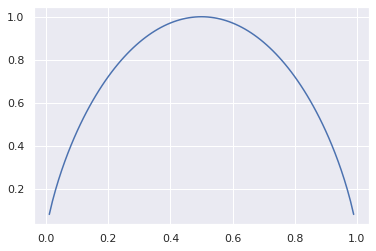

In [31]:
plt.plot(p, entropies)

### Rozważmy dane

| ID | Dochód | Liczba osób w gospodarstwie | Wiarygodność | Udzielenie pożyczki |
|----|--------|-----------------------------|--------------|---------------------|
| 1  | niski  | 1                           | niska        | 0                   |
| 2  | niski  | 3                           | niska        | 0                   |
| 3  | średni | 4                           | niska        | 0                   |
| 4  | wysoki | 3                           | średnia      | 0                   |
| 5  | wysoki | 4                           | wysoka       | 1                   |
| 6  | niski  | 4                           | niska        | 0                   |
| 7  | średni | 2                           | średnia      | 1                   |
| 8  | wysoki | 3                           | wysoka       | 1                   |
| 9  | średni | 5                           | niska        | 0                   |
| 10 | średni | 1                           | wysoka       | 1                   |


Rozkład zmiennej Udzienie pożyczki:

| Udzielenie pożyczki | 0    | 1    |
|---------------------|------|------|
| $p_{i}$               | 6/10 | 4/10 |


Wzór na entropię:
###  $E = - \sum_{i=1}^{n}p_{i} \cdot log_{2}p_{i}$

Entropia po podziale:

###  $E_{after}  = \sum_{i=1}^{m} \frac{S_{i}}{S}Entropia(S_{i})$

gdzie 
$S$ - podział
$m$ - liczba podziałów



In [32]:
entropia = -(6/10 * np.log2(6/10) + (4/10) * np.log2(4/10))
entropia

0.9709505944546686

### Rozkład zmiennej `Wiarygodność`

|         | udział | udzielenie pożyczki = 0 | udzielenie pożyczki = 1 |  Entropia
|---------|--------|-------------------------|-------------------------|--------|
| niska   | 5/10   | 1                       | 0                       | 0
| średnia | 2/10   | 1/2                     | 1/2                     | 1
| wysoka  | 3/10   | 0                       | 1                       | 0

Entropia po podziale

In [33]:
entropia_wiarygodnosc = 5/10 * 0 + 2/10 * 1 + 3/10 * 0
entropia_wiarygodnosc

0.2

### Rozkład zmiennej  `Dochód`

|        | udział | udzielenie pożyczki = 0 | udzielenie pożyczki = 1 | Entropia
|--------|--------|-------------------------|-------------------------|----------|
| niski  | 3/10   | 1                       | 0                       |0
| sredni | 4/10   | 2/4                     | 2/4                     |1
| wysoki | 3/10   | 1/3                     | 2/3                     | 0.9183

Entropia po podziale

In [34]:
entropia_dochod = 3/10 * 0 + 4/10 * 1 + 3/10 * 0.9183
entropia_dochod

0.67549

### Zysk Informacyjny

$IG (Information\ Gain) = Entropia\ przed\ podziałem - Entropia\ po\ podziale$

In [35]:
ig_wiarygodnosc = entropia - entropia_wiarygodnosc
ig_dochod = entropia - entropia_dochod

print('Zysk informacyjny (IG): wiarygodność:', ig_wiarygodnosc)
print('Zysk informacyjny (IG): dochód:', ig_dochod)

Zysk informacyjny (IG): wiarygodność: 0.7709505944546686
Zysk informacyjny (IG): dochód: 0.29546059445466855
